In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

(6, 2)


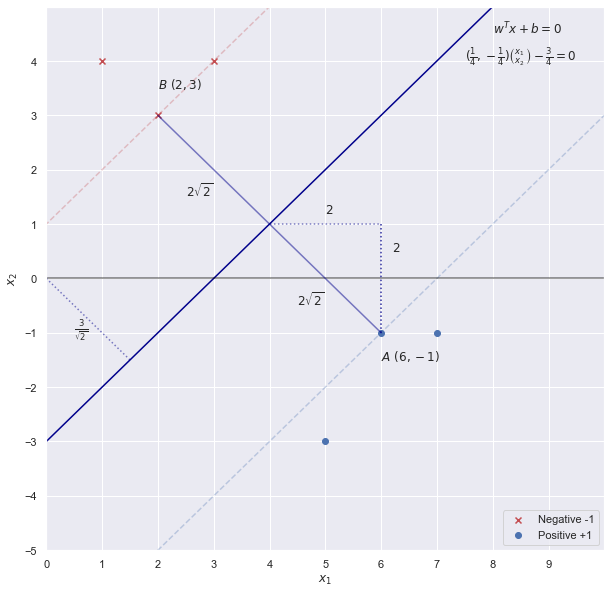

In [9]:
#Data set
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3]])
y_pos = np.array([1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

#Data for the next section
X = np.vstack((x_pos, x_neg))
print(X.shape)
y = np.concatenate((y_pos,y_neg))

#Parameters guessed by inspection
w = np.array([1,-1]).reshape(-1,1)
b = -3

#Plot
fig = plt.figure(figsize = (10,10))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue')
plt.plot(x1, x1  - 7, linestyle = '--', alpha = .3, color = 'b')
plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)
plt.plot([2,6],[3,-1], linestyle = '-', color = 'darkblue', alpha = .5 )
plt.plot([4,6],[1,1],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )
plt.plot([0,1.5],[0,-1.5],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )

#Annotations
plt.annotate(s = '$A \ (6,-1)$', xy = (5,-1), xytext = (6,-1.5))
plt.annotate(s = '$B \ (2,3)$', xy = (2,3), xytext = (2,3.5))#, arrowprops = {'width':.2, 'headwidth':8})
plt.annotate(s = '$2$', xy = (5,1.2), xytext = (5,1.2) )
plt.annotate(s = '$2$', xy = (6.2,.5), xytext = (6.2,.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (4.5,-.5), xytext = (4.5,-.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (2.5,1.5), xytext = (2.5,1.5))
plt.annotate(s = '$w^Tx + b = 0$', xy = (8,4.5), xytext = (8,4.5))
plt.annotate(s = '$(\\frac{1}{4},-\\frac{1}{4}) \\binom{x_1}{x_2}- \\frac{3}{4} = 0$', xy = (7.5,4), xytext = (7.5,4))
plt.annotate(s = '$\\frac{3}{\sqrt{2}}$', xy = (.5,-1), xytext = (.5,-1))

#Labels and show
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 'lower right')
plt.show()

In [14]:
#Importing with custom names to avoid issues with numpy / sympy matrix
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
print(m, n)
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.
print(H.shape)

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))
print('P = '+str(P.size))
print('q = '+str(q.size))
print('G = '+str(G.size))
print('h = '+str(h.size))
print('A = '+str(A.size))
print('b = '+str(b.size))
print('y = '+str(y.shape))

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])
print('alphas ='+str(alphas.size))

6 2
(6, 6)
P = (6, 6)
q = (6, 1)
G = (6, 6)
h = (6, 1)
A = (1, 6)
b = (1, 1)
y = (6, 1)
alphas =6


In [4]:
#w parameter in vectorized form
w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0]) 

Alphas =  [0.0625     0.06249356]
w =  [ 0.24999356 -0.25000644]
b =  [-0.74996781]


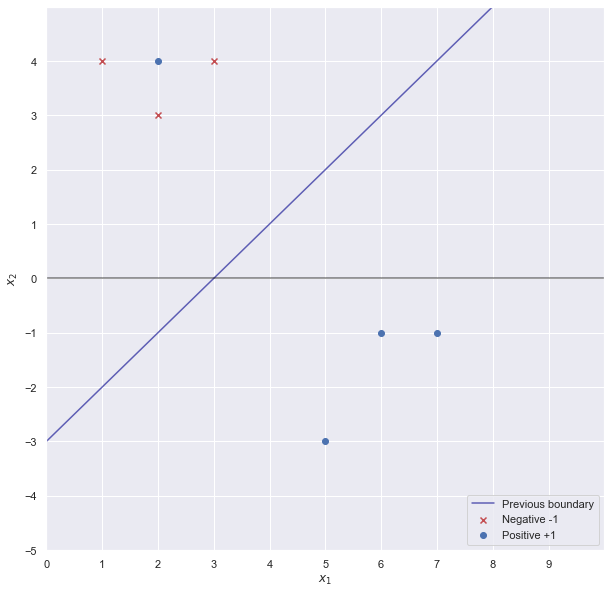

In [5]:
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3],[2,4]])
y_pos = np.array([1,1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))


fig = plt.figure(figsize = (10,10))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue', alpha = .6, label = 'Previous boundary')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.legend(loc = 'lower right')
plt.show()

#New dataset (for later)
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3],[2,4]] )
y = np.array([-1,-1, -1, 1, 1 , 1, 1 ])

In [18]:
#Initializing values and computing H. Note the 1. to force to float type
C = 10
m,n = X.shape
print(X.shape)
print(y.shape)
y = y.reshape(-1,1) * 1.
print(y.shape)
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

print('P = '+str(P.size))
print('q = '+str(q.size))
print('G = '+str(G.size))
print('h = '+str(h.size))
print('A = '+str(A.size))
print('b = '+str(b.size))
print('y = '+str(y.shape))
#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])
print('alphas ='+str(alphas.size))
#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

(6, 2)
(6, 1)
(6, 1)
P = (6, 6)
q = (6, 1)
G = (12, 6)
h = (12, 1)
A = (1, 6)
b = (1, 1)
y = (6, 1)
alphas =6
Alphas =  [0.0625     0.06249694]
w =  [ 0.24999694 -0.25000306]
b =  [-0.74998471]


In [7]:
clf = SVC(C = 10, kernel = 'linear')
clf.fit(X, y.ravel()) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))


w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors =  [0 2 3 6]
Support vectors =  [[ 3.  4.]
 [ 2.  3.]
 [ 6. -1.]
 [ 2.  4.]]
Number of support vectors for each class =  [2 2]
Coefficients of the support vector in the decision function =  [[ 5.      6.3125  1.3125 10.    ]]


In [21]:
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=gaussian_kernel, C=None, scale=None):
        self.kernel = gaussian_kernel
        self.scale = scale
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j], sigma=self.scale)

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        #print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv, sigma=self.scale)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

import numpy,sklearn,sklearn.datasets,numpy

D = sklearn.datasets.load_breast_cancer()
X = D['data']
T = D['target']
T = (D['target']==1)*2.0-1.0

for scale in [30,100,300,1000,3000]:
    for C in [10,100,1000,10000]:
        
        acctrain,acctest,nbsvs = [],[],[]
        
        svm = SVM(C=C,scale=scale)
        
        for i in range(10):

            # Split the data
            R = numpy.random.mtrand.RandomState(i).permutation(len(X))
            Xtrain,Xtest = X[R[:len(R)//2]]*1,X[R[len(R)//2:]]*1
            Ttrain,Ttest = T[R[:len(R)//2]]*1,T[R[len(R)//2:]]*1

            # Train and test the SVM
            svm.fit(Xtrain,Ttrain)
            
            acctrain += [(svm.predict(Xtrain)==Ttrain).mean()]
            acctest  += [(svm.predict(Xtest)==Ttest).mean()]
            nbsvs += [len(svm.a)*1.0]

        print('scale=%9.1f  C=%9.1f  nSV: %4d  train: %.3f  test: %.3f'%(
            scale,C,numpy.mean(nbsvs),numpy.mean(acctrain),numpy.mean(acctest)))
    print('')
    
    

scale=     30.0  C=     10.0  nSV:  164  train: 0.998  test: 0.920
scale=     30.0  C=    100.0  nSV:  162  train: 1.000  test: 0.918
scale=     30.0  C=   1000.0  nSV:  162  train: 1.000  test: 0.918
scale=     30.0  C=  10000.0  nSV:  162  train: 1.000  test: 0.918

scale=    100.0  C=     10.0  nSV:   83  train: 0.967  test: 0.936
scale=    100.0  C=    100.0  nSV:   72  train: 0.988  test: 0.940
scale=    100.0  C=   1000.0  nSV:   66  train: 0.998  test: 0.932
scale=    100.0  C=  10000.0  nSV:   60  train: 1.000  test: 0.926

scale=    300.0  C=     10.0  nSV:   60  train: 0.940  test: 0.928
scale=    300.0  C=    100.0  nSV:   45  train: 0.962  test: 0.945
scale=    300.0  C=   1000.0  nSV:   34  train: 0.978  test: 0.946
scale=    300.0  C=  10000.0  nSV:   29  train: 0.991  test: 0.941

scale=   1000.0  C=     10.0  nSV:   62  train: 0.928  test: 0.922
scale=   1000.0  C=    100.0  nSV:   51  train: 0.941  test: 0.931
scale=   1000.0  C=   1000.0  nSV:   44  train: 0.955  test

In [22]:
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=gaussian_kernel, C=None, scale=None):
        self.scale = scale
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = gaussian_kernel(X[i], X[j], sigma=self.scale)

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        #print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

    def predict(self, X):
        y_predict = np.zeros(len(X))
        for i in range(len(X)):
            s = 0
            for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                s += a * sv_y * gaussian_kernel(X[i], sv, sigma=self.scale)
            y_predict[i] = s
        return np.sign(y_predict + self.b)

import numpy,sklearn,sklearn.datasets,numpy

D = sklearn.datasets.load_breast_cancer()
X = D['data']
T = D['target']
T = (D['target']==1)*2.0-1.0

for scale in [30,100,300,1000,3000]:
    for C in [10,100,1000,10000]:
        
        acctrain,acctest,nbsvs = [],[],[]
        
        svm = SVM(C=C,scale=scale)
        
        for i in range(10):

            # Split the data
            R = numpy.random.mtrand.RandomState(i).permutation(len(X))
            Xtrain,Xtest = X[R[:len(R)//2]]*1,X[R[len(R)//2:]]*1
            Ttrain,Ttest = T[R[:len(R)//2]]*1,T[R[len(R)//2:]]*1

            # Train and test the SVM
            svm.fit(Xtrain,Ttrain)
            
            acctrain += [(svm.predict(Xtrain)==Ttrain).mean()]
            acctest  += [(svm.predict(Xtest)==Ttest).mean()]
            nbsvs += [len(svm.a)*1.0]

        print('scale=%9.1f  C=%9.1f  nSV: %4d  train: %.3f  test: %.3f'%(
            scale,C,numpy.mean(nbsvs),numpy.mean(acctrain),numpy.mean(acctest)))
    print('')
    
    

scale=     30.0  C=     10.0  nSV:  164  train: 0.998  test: 0.920
scale=     30.0  C=    100.0  nSV:  162  train: 1.000  test: 0.918
scale=     30.0  C=   1000.0  nSV:  162  train: 1.000  test: 0.918
scale=     30.0  C=  10000.0  nSV:  162  train: 1.000  test: 0.918

scale=    100.0  C=     10.0  nSV:   83  train: 0.967  test: 0.936
scale=    100.0  C=    100.0  nSV:   72  train: 0.988  test: 0.940
scale=    100.0  C=   1000.0  nSV:   66  train: 0.998  test: 0.932
scale=    100.0  C=  10000.0  nSV:   60  train: 1.000  test: 0.926

scale=    300.0  C=     10.0  nSV:   60  train: 0.940  test: 0.928
scale=    300.0  C=    100.0  nSV:   45  train: 0.962  test: 0.945
scale=    300.0  C=   1000.0  nSV:   34  train: 0.978  test: 0.946
scale=    300.0  C=  10000.0  nSV:   29  train: 0.991  test: 0.941

scale=   1000.0  C=     10.0  nSV:   62  train: 0.928  test: 0.922
scale=   1000.0  C=    100.0  nSV:   51  train: 0.941  test: 0.931
scale=   1000.0  C=   1000.0  nSV:   44  train: 0.955  test

In [31]:
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
             
def getGaussianKernel(x,y,scale):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (scale ** 2)))


import cvxopt,cvxopt.solvers
cvxopt.solvers.options['show_progress'] = False

def getQPMatrices(K,T,C):   
    n_samples = K.shape[0]
    P = cvxopt.matrix(np.outer(T,T) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(T, (1,n_samples))
    b = cvxopt.matrix(0.0)

    if C is None:
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        h = cvxopt.matrix(np.zeros(n_samples))
    else:
        tmp1 = np.diag(np.ones(n_samples) * -1)
        tmp2 = np.identity(n_samples)
        G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
        tmp1 = np.zeros(n_samples)
        tmp2 = np.ones(n_samples) * C
        h = cvxopt.matrix(np.hstack((tmp1, tmp2)))
    return P,q,G,h,A,b

def getTheta(K,T,alpha,C):
    # Support vectors have non zero lagrange multipliers
    sv = alpha > 1e-5
    ind = np.arange(len(alpha))[sv]
    a = alpha[sv]
    sv_y = T[sv]
    #print("%d support vectors out of %d points" % (len(self.a), n_samples))

    # Intercept
    b = 0
    for n in range(len(a)):
        b += sv_y[n]
        b -= np.sum(a * sv_y * K[ind[n],sv])
    b /= len(a)
    return b

class SVM(object):

    def __init__(self, kernel=gaussian_kernel, C=None, scale=None):
        self.scale = scale
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, T):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = gaussian_kernel(X[i], X[j], sigma=self.scale)

        P,q,G,h,A,b = getQPMatrices(K, T, self.C)

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        self.b = getTheta(K, T, a, self.C)
        
        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = T[sv]
        #print("%d support vectors out of %d points" % (len(self.a), n_samples))


    def predict(self, X):
        y_predict = np.zeros(len(X))
        for i in range(len(X)):
            s = 0
            for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                s += a * sv_y * gaussian_kernel(X[i], sv, sigma=self.scale)
            y_predict[i] = s
        return np.sign(y_predict + self.b)

import numpy,sklearn,sklearn.datasets,numpy

D = sklearn.datasets.load_breast_cancer()
X = D['data']
T = D['target']
T = (D['target']==1)*2.0-1.0

for scale in [30,100,300,1000,3000]:
    for C in [10,100,1000,10000]:
        
        acctrain,acctest,nbsvs = [],[],[]
        
        svm = SVM(C=C,scale=scale)
        
        for i in range(10):

            # Split the data
            R = numpy.random.mtrand.RandomState(i).permutation(len(X))
            Xtrain,Xtest = X[R[:len(R)//2]]*1,X[R[len(R)//2:]]*1
            Ttrain,Ttest = T[R[:len(R)//2]]*1,T[R[len(R)//2:]]*1

            # Train and test the SVM
            svm.fit(Xtrain,Ttrain)
            
            acctrain += [(svm.predict(Xtrain)==Ttrain).mean()]
            acctest  += [(svm.predict(Xtest)==Ttest).mean()]
            nbsvs += [len(svm.a)*1.0]

        print('scale=%9.1f  C=%9.1f  nSV: %4d  train: %.3f  test: %.3f'%(
            scale,C,numpy.mean(nbsvs),numpy.mean(acctrain),numpy.mean(acctest)))
    print('')
    

scale=     30.0  C=     10.0  nSV:  164  train: 0.998  test: 0.920
scale=     30.0  C=    100.0  nSV:  162  train: 1.000  test: 0.918
scale=     30.0  C=   1000.0  nSV:  162  train: 1.000  test: 0.918
scale=     30.0  C=  10000.0  nSV:  162  train: 1.000  test: 0.918

scale=    100.0  C=     10.0  nSV:   83  train: 0.967  test: 0.936
scale=    100.0  C=    100.0  nSV:   72  train: 0.988  test: 0.940
scale=    100.0  C=   1000.0  nSV:   66  train: 0.998  test: 0.932
scale=    100.0  C=  10000.0  nSV:   60  train: 1.000  test: 0.926

scale=    300.0  C=     10.0  nSV:   60  train: 0.940  test: 0.928
scale=    300.0  C=    100.0  nSV:   45  train: 0.962  test: 0.945
scale=    300.0  C=   1000.0  nSV:   34  train: 0.978  test: 0.946
scale=    300.0  C=  10000.0  nSV:   29  train: 0.991  test: 0.941

scale=   1000.0  C=     10.0  nSV:   62  train: 0.928  test: 0.922
scale=   1000.0  C=    100.0  nSV:   51  train: 0.941  test: 0.931
scale=   1000.0  C=   1000.0  nSV:   44  train: 0.955  test